In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model, model_selection, metrics, ensemble
import matplotlib.pylab as plt
import seaborn as sns
import itertools

In [2]:
#Load in data, create pandas dataframes, combine target and features.

cancer_ds = datasets.load_breast_cancer()
features = pd.DataFrame(data = cancer_ds.data, columns = cancer_ds.feature_names)
target = pd.DataFrame(data = cancer_ds.target, columns = ['diagnosis'])
df = pd.concat([target, features], axis = 1)

In [66]:
print(cancer_ds.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [67]:
df.diagnosis.value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [68]:
#Show column names
df.columns.values

array(['diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
       'mean_area', 'mean_smoothness', 'mean_compactness',
       'mean_concavity', 'mean_concave_points', 'mean_symmetry',
       'mean_fractal_dimension', 'radius_error', 'texture_error',
       'perimeter_error', 'area_error', 'smoothness_error',
       'compactness_error', 'concavity_error', 'concave_points_error',
       'symmetry_error', 'fractal_dimension_error', 'worst_radius',
       'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension'], dtype=object)

In [69]:
#Get information on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
mean_radius                569 non-null float64
mean_texture               569 non-null float64
mean_perimeter             569 non-null float64
mean_area                  569 non-null float64
mean_smoothness            569 non-null float64
mean_compactness           569 non-null float64
mean_concavity             569 non-null float64
mean_concave_points        569 non-null float64
mean_symmetry              569 non-null float64
mean_fractal_dimension     569 non-null float64
radius_error               569 non-null float64
texture_error              569 non-null float64
perimeter_error            569 non-null float64
area_error                 569 non-null float64
smoothness_error           569 non-null float64
compactness_error          569 non-null float64
concavity_error            569 non-null float64
concave_points_error       569 no

In [70]:
#Replace all spaces in column names with underscores
df.columns = [x.replace(' ', '_') for x in df.columns]

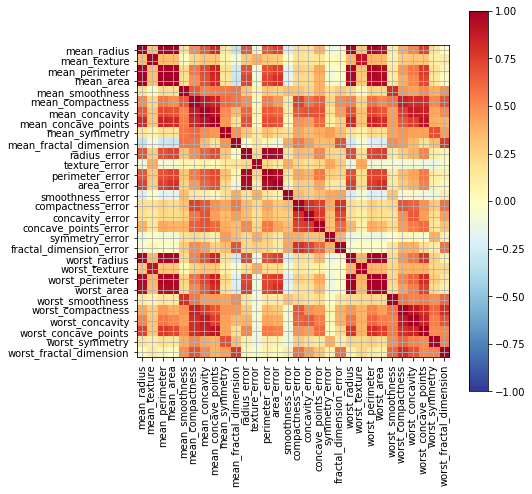

In [71]:
#Plot correlations between all variables
figure = plt.figure(figsize = [7, 7])
ax = plt.imshow(df[df.columns[1:]].corr(), 
                vmin = -1.0, 
                vmax = 1.0, 
                interpolation = 'None', 
                cmap = 'RdYlBu_r')

plt.xticks(np.arange(0, df.shape[1] - 1), df.columns[1:], rotation = 90);
plt.yticks(np.arange(0, df.shape[1] - 1), df.columns[1:]);
plt.colorbar();
plt.grid();

In [72]:
X = df.iloc[:,1:]

In [73]:
y = df['diagnosis']

In [74]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=101)
print('Training data shape = {}'.format(X_train.shape))
print('Testing data shape = {}'.format(X_test.shape))
print('Training label shape = {}'.format(y_train.shape))
print('Testing label shape = {}'.format(y_test.shape))

Training data shape = (455, 30)
Testing data shape = (114, 30)
Training label shape = (455,)
Testing label shape = (114,)


Accuracy of the model is 96.49%


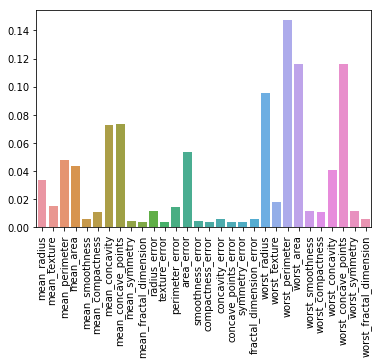

In [75]:
#Run Random Forest to classify 

rf = ensemble.RandomForestClassifier(random_state = 101,n_estimators=200)
rf_model = rf.fit(x_train, y_train)
y_hat = rf_model.predict(x_test)

#Show model accuracy
print('Accuracy of the model is {}%'.format(np.round(metrics.accuracy_score(y_test, y_hat), decimals = 4) * 100))
cm = metrics.confusion_matrix(y_test, y_hat)

#Plot coefficents
plt.figure()
ax = sns.barplot(x = np.arange(0, rf_model.feature_importances_.shape[0]), 
            y = rf_model.feature_importances_);
plt.xticks(np.arange(0, rf_model.feature_importances_.shape[0]), 
           x_test.columns, 
           rotation = 90);

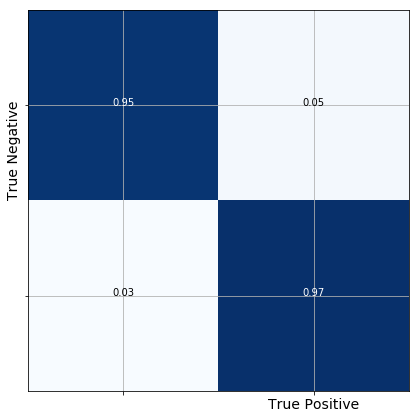

In [34]:
#Plot confusion matrix 
cmap = plt.cm.Blues
cm_stand = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
cm_stand
thresh = cm_stand.max() / 2

plt.figure(figsize = [7, 7])
plt.imshow(cm_stand, cmap = cmap)
plt.grid()

plt.xticks(np.arange(0, 2), ['', 'True Positive'], fontsize=14)
plt.yticks(np.arange(0, 2), ['True Negative', ''], rotation = 90, fontsize=14)

for i, j in itertools.product(range(cm_stand.shape[0]), range(cm_stand.shape[1])):
    plt.text(j, i, format(cm_stand[i, j], '.2f'),
             horizontalalignment = 'center',
             color = 'white' if cm_stand[i, j] > thresh else 'black')

Accuracy of the model is 99.12%


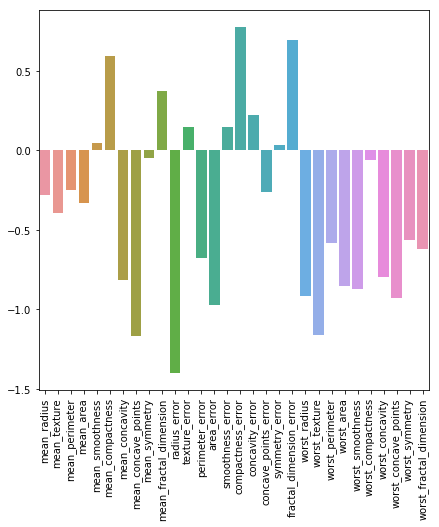

In [40]:
#Repeat with standard logistic regression 
log_reg = linear_model.LogisticRegression()
log_model = log_reg.fit(x_train, y_train)
y_hat = log_model.predict(x_test)

#Show model scores
print('Accuracy of the model is {}%'.format(np.round(metrics.accuracy_score(y_test, y_hat), decimals = 4) * 100))
cm = metrics.confusion_matrix(y_test, y_hat)

coef = log_model.coef_[0]

#Plot coeffiencients
plt.figure(figsize = [7, 7])
ax = sns.barplot(x = np.arange(0, coef.shape[0]), 
                 y = coef);
plt.xticks(np.arange(0, coef.shape[0]), 
           x_test.columns, 
           rotation = 90);

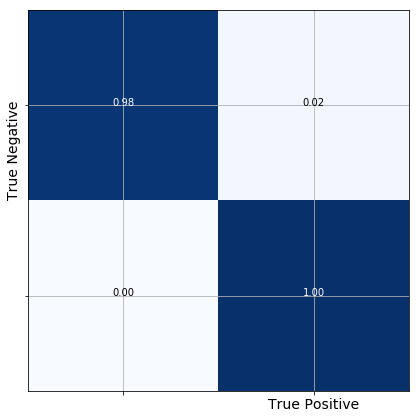

In [41]:
#Plot confusion matrix 
cmap = plt.cm.Blues
cm_stand = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
cm_stand
thresh = cm_stand.max() / 2

plt.figure(figsize = [7, 7])
plt.imshow(cm_stand, cmap = cmap)
plt.grid()

plt.xticks(np.arange(0, 2), ['', 'True Positive'], fontsize=14)
plt.yticks(np.arange(0, 2), ['True Negative', ''], rotation = 90, fontsize=14)

for i, j in itertools.product(range(cm_stand.shape[0]), range(cm_stand.shape[1])):
    plt.text(j, i, format(cm_stand[i, j], '.2f'),
             horizontalalignment = "center",
             color="white" if cm_stand[i, j] > thresh else "black")

Normalized confusion matrix
[[ 0.95  0.05]
 [ 0.03  0.97]]


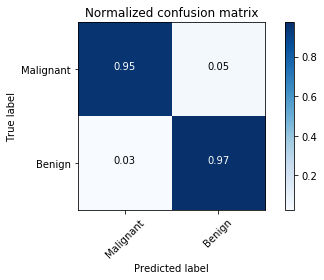

In [78]:
from sklearn.metrics import confusion_matrix

class_names = ['Malignant','Benign']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
